# 1. MySQL 데이터 불러오기

!pip install install mysql-connector-python

MySQL에서 데이터 불러오기

법률정보_리스트

In [3]:
# mysql.connector: MySQL 데이터베이스와 연결하기 위한 라이브러리
import mysql.connector

# pandas: 데이터 분석을 위한 라이브러리, 데이터프레임 생성 및 처리에 사용
import pandas as pd

# db_info 모듈에서 데이터베이스 연결 정보 가져오기
from db_info import user, password, host, database, port

# MySQL 데이터베이스에 연결
db_connection = mysql.connector.connect(
    host=host,          # 데이터베이스 호스트
    user=user,          # 사용자 이름
    password=password,  # 사용자 비밀번호
    database=database,  # 데이터베이스 이름
    port=port           # 포트 번호
)

# 데이터베이스 작업을 위한 커서 생성
cursor = db_connection.cursor()

# law_search_table에서 모든 데이터 선택
cursor.execute("SELECT * FROM law_search_table")

# 쿼리 실행 결과를 가져옴
result = cursor.fetchall()

# 결과를 데이터프레임으로 변환, 컬럼 이름은 쿼리 결과의 첫 번째 행에서 가져옴
law_search = pd.DataFrame(result, columns=[i[0] for i in cursor.description])

# law_search 데이터프레임 출력
law_search

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크
0,101264,재심청구기각결정에대한재항고,85모32,1985.09.28,대법원,형사,/DRF/lawService.do?OC=znaeng110&target=prec&ID...
1,76281,보건범죄단속에관한특별조치법위반(식품)피고사건,85고합228,1985.09.27,인천지방법원,형사,/DRF/lawService.do?OC=znaeng110&target=prec&ID...
2,76242,건물철거등청구사건,84나2318,1985.09.27,서울고등법원,민사,/DRF/lawService.do?OC=znaeng110&target=prec&ID...
3,76243,손해배상청구사건,84나4640,1985.09.27,서울고등법원,민사,/DRF/lawService.do?OC=znaeng110&target=prec&ID...
4,224051,해고무효확인청구소송,85나625,1985.09.27,서울고등법원,민사,/DRF/lawService.do?OC=znaeng110&target=prec&ID...
...,...,...,...,...,...,...,...
87573,150030,분양대금,2009다75321,2010.12.09,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
87574,147374,채무부존재확인,2010다70773,2010.12.09,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
87575,150051,부당이득금,2010다62413,2010.12.09,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
87576,149558,거절결정(상),2010허7198,2010.12.09,특허법원,특허,/DRF/lawService.do?OC=wanja1996&target=prec&ID...


판례리스트_근로

In [4]:
import mysql.connector
import pandas as pd
from db_info import user,password,host,database,port

db_connection = mysql.connector.connect(
    host = host,
    user = user,
    password = password,
    database = database,
    port = port
)

cursor = db_connection.cursor()

cursor.execute("SELECT * FROM labor_list")

result = cursor.fetchall()

labor_list = pd.DataFrame(result, columns = [i[0] for i in cursor.description])

labor_list

,판례일련번호,사건명,사건번호,선고일자,법원명,사건종류명,판례상세링크
0,241221,부당해고구제재심판정취소[온라인 플랫폼에 기반한 차량 대여 및 기사 제공 서비스에서 ...,2024두32973,2024.07.25,대법원,일반행정,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
1,241233,근로에관한소송·근로에관한소송·근로에관한소송,2024다211908,2024.07.25,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
2,241219,근로자지위확인[파견근로자에 대한 퇴직금 공제의 범위가 문제된 사건],2020다287921,2024.07.25,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
3,241051,근로자지위확인등[근로자파견관계 인정 여부 등이 문제된 사건],2021다274069,2024.07.11,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
4,241027,임금등[비전업 시간강사가 초단시간근로자에 해당하는지 여부가 문제된 사건],2023다217312,2024.07.11,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
...,...,...,...,...,...,...,...
5011,71916,세금부과처분취소청구사건,62구17,1962.06.18,서울고등법원,세무,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
5012,157410,해고수당,4294민상1301,1962.03.22,대법원,민사,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
5013,133705,행정처분취소청구사건,4292행121,1960.07.20,서울고등법원,일반행정,/DRF/lawService.do?OC=wanja1996&target=prec&ID...
5014,208998,행정처분취소,4289행상111,1957.02.22,대법원,일반행정,/DRF/lawService.do?OC=wanja1996&target=prec&ID...


판례본문_근로

In [5]:
import mysql.connector
import pandas as pd
from db_info import user,password,host,database,port

db_connection = mysql.connector.connect(
    host = host,
    user = user,
    password = password,
    database = database,
    port = port
)

cursor = db_connection.cursor()

cursor.execute("SELECT * FROM labor_content")

result = cursor.fetchall()

labor_content = pd.DataFrame(result, columns = [i[0] for i in cursor.description])

labor_content

,판례정보일련번호,사건번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용
0,241221,2024두32973,선고,판결,[1] 부당해고 등 구제절차에서 피신청인의 추가·변경이 허용되는지 여부(한정 적극...,[1] 부당해고 등 구제절차에서 최초 구제신청의 대상이 된 불이익처분을 다투는 범...,"[1] 근로기준법 제28조, 제29조, 노동위원회법 제23조 / [2] 근로기준법...","[1] 대법원 1996. 8. 23. 선고 95누11238 판결(공1996하, 2...","【원고, 상고인】 주식회사 ○○ (소송대리인 변호사 김소영 외 5인)<br/>【피고..."
1,241233,"2024다211908, 211915, 211922",선고,판결,[1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...,[1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...,"[1] 파견근로자 보호 등에 관한 법률 제6조의2 제1항, 민법 제390조, 제3...","[1] 대법원 2007. 11. 16. 선고 2005다3229 판결, 대법원 20...","【원고, 피상고인】 원고 1 외 2인 (소송대리인 변호사 조창래)<br/>【피고, ..."
2,241219,2020다287921,선고,판결,구 파견근로자 보호 등에 관한 법률에 따라 직접고용간주의 효과가 발생하였으나 사용...,구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 ...,구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 개...,"대법원 2024. 3. 12. 선고 2019다223303, 223310 판결(공20...","【원고, 피상고인】 별지 원고들 명단 기재와 같다. (소송대리인 변호사 방광호)<b..."
3,241051,2021다274069,선고,판결,"[1] 원고용주가 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우, 파...",[1] 원고용주가 어느 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우...,[1] 파견근로자 보호 등에 관한 법률 제2조 제1호 / [2] 파견근로자 보호 ...,[1][3] 대법원 2015. 11. 26. 선고 2013다14965 판결(공20...,"【원고, 피상고인】 원고 1 외 1인 (소송대리인 법무법인 금강 담당변호사 고규정 ..."
4,241027,2023다217312,선고,판결,[1] 대학의 시간강사가 근로기준법 제18조 제3항에서 정한 ‘초단시간근로자’에 ...,[1] 근로기준법 제18조는 1주 동안의 소정근로시간이 그 사업장에서 같은 종류의...,"[1] 근로기준법 제18조 / [2] 근로기준법 제18조, 구 고등교육법 시행령(...",None,"【원고, 상고인】 원고 1 외 7인 (소송대리인 법무법인 창조 외 3인)<br/>【..."
...,...,...,...,...,...,...,...,...,...
5011,71916,62구17,선고,제1특별부판결 : 상고,국회의원에 대한 갑종근로소득세 징수에 있어 원천징수의무자의 의미<br/>,국회의원에 대한 갑종근로세 징수에 있어 원천징수의무자는 「국가」라 할 것이므로 5·...,소득세법(구) 제32조<br/>,None,【원 고】 소선규<br/>【피 고】 종로세무서장<br/>【주 ...
5012,157410,4294민상1301,선고,판결,근로 기준법 제28조와 \n \n \n ...,구 근로기준법(53.5.10. 법률 제266호) 제28조에도 해당되고 \n ...,"근로기준법 제28조\n, \n \n \n 제9...",None,"【원고, 피상고인】 선정당시자 \n \n \n ..."
5013,133705,4292행121,선고,제1특별부판결 : 확정,연고권 없는 자에 대한 귀속재산 임대계약취소의 적부<br/>,해방후 10여년간 귀속재산인 토지의개척을 위하여 물심양면으로 적극노력함으로써 황무...,"행정소송법(법률 제213호) 제12조, \n 귀속재산처리법 제15조<br/>","1955. 8. 10. 선고, 4288행상41 판결(요 귀속재산처리법 제15조(15...",【원 고】 재단법인 대전벧엘원<br/>【피 고】 충청남도 관재국장<br/...
5014,208998,4289행상111,선고,판결,노동쟁의 당사자 일방의 교섭대표자와 노동위원회 중재판정 관여<br/>,노동쟁의 당사자에 일방적인 서울지역 자동차노동조합의 교섭대표자인 소외 1이 서울특...,"노동조합법 제33조, 제34조, 노동위원회규칙 제5조<br/>",None,"【원고, 피상고인】 서울특별시내여객자동차운송사업조합<br/>【피고, 상고인】 ..."


# 2. 데이터 전처리 하기 

In [6]:
# 데이터 처리 및 분석
import pandas as pd
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 문자
import re

In [7]:
import pandas as pd

# 한글 깨짐 방지
plt.rcParams['font.family'] = "Malgun Gothic"

# 마이너스 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

In [8]:
#데이터 프레임 명칭 변경

df_labor = labor_content.copy()

In [9]:
# 1. 데이터프레임 전처리 함수 정의 (HTML 태그 및 공백 문자 제거)
def preprocess_content(content):
    if pd.isna(content):  # NaN 값에 대한 예외 처리
        return content
    
    # content가 문자열인지 확인
    if isinstance(content, str):
        content = content.replace('<br/>', '')  # HTML 태그 제거
        content = content.replace('\n', '')     # 줄바꿈 문자 제거
        content = content.replace('\r', '')     # 캐리지 리턴 문자 제거
    
    return content

# 2. 숫자와 특수문자 제거 함수 정의 (TF-IDF를 적용할 문서 리스트에 사용)
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = re.sub(r'[^\w\s]', '', text)  # 특수문자 제거
    text = text.replace('<br/>', ' ').replace('\n', ' ').replace('\r', ' ')  # 추가적인 불필요한 문자를 공백으로 대체
    return text

# 3. 데이터프레임의 여러 열에 전처리를 적용할 경우 (HTML 태그 제거)
columns_to_preprocess = ['판시사항', '판결요지', '판례내용']

# 각 열에 개별적으로 전처리 함수 적용
for col in columns_to_preprocess:
    if col in df_labor.columns:
        df_labor[col] = df_labor[col].apply(preprocess_content)

# 4. 전처리 후 결과 확인 (상위 5개 출력)
print(df_labor.head())

# 5. 문서 리스트에 숫자 및 특수 문자 제거 적용 (TF-IDF를 위한 전처리)
documents = df_labor['판례내용'].tolist()
documents = [preprocess_text(doc) for doc in documents]

# 전처리된 문서 리스트 확인 (상위 5개 출력)
print(documents[:5])

   판례정보일련번호                         사건번호  선고 판결유형  \
0    241221                   2024두32973  선고   판결   
1    241233  2024다211908, 211915, 211922  선고   판결   
2    241219                  2020다287921  선고   판결   
3    241051                  2021다274069  선고   판결   
4    241027                  2023다217312  선고   판결   

                                                판시사항  \
0   [1] 부당해고 등 구제절차에서 피신청인의 추가·변경이 허용되는지 여부(한정 적극...   
1   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
2   구 파견근로자 보호 등에 관한 법률에 따라 직접고용간주의 효과가 발생하였으나 사용...   
3   [1] 원고용주가 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우, 파...   
4   [1] 대학의 시간강사가 근로기준법 제18조 제3항에서 정한 ‘초단시간근로자’에 ...   

                                                판결요지  \
0   [1] 부당해고 등 구제절차에서 최초 구제신청의 대상이 된 불이익처분을 다투는 범...   
1   [1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...   
2   구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 ...   
3   [1] 원고용주가 어느 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우...   
4   [1] 근로기준법 제18조는 1주 동안의 소정근로시간이 그 사업장에서 같은 종류의...   

       

In [10]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   판례정보일련번호  5016 non-null   int64 
 1   사건번호      5016 non-null   object
 2   선고        5016 non-null   object
 3   판결유형      5016 non-null   object
 4   판시사항      3735 non-null   object
 5   판결요지      3073 non-null   object
 6   참조조문      3724 non-null   object
 7   참조판례      2450 non-null   object
 8   판례내용      5016 non-null   object
dtypes: int64(1), object(8)
memory usage: 352.8+ KB


판례본문 내용분리

In [11]:
# 판례본문 내용 분리 - 이유 기준 분리

# '【이' 앞부분과 '【이'를 포함한 뒷부분으로 나누는 코드
df_labor['판례내용_상단'] = df_labor['판례내용'].str.split('【이').str[0]
df_labor['판례내용_이유'] = df_labor['판례내용'].str.extract(r'(【이.*)')

# 결과 출력
df_labor.head()

,판례정보일련번호,사건번호,선고,판결유형,판시사항,판결요지,참조조문,참조판례,판례내용,판례내용_상단,판례내용_이유
0,241221,2024두32973,선고,판결,[1] 부당해고 등 구제절차에서 피신청인의 추가·변경이 허용되는지 여부(한정 적극...,[1] 부당해고 등 구제절차에서 최초 구제신청의 대상이 된 불이익처분을 다투는 범...,"[1] 근로기준법 제28조, 제29조, 노동위원회법 제23조 / [2] 근로기준법...","[1] 대법원 1996. 8. 23. 선고 95누11238 판결(공1996하, 2...","【원고, 상고인】 주식회사 ○○ (소송대리인 변호사 김소영 외 5인)【피고, 피상고...","【원고, 상고인】 주식회사 ○○ (소송대리인 변호사 김소영 외 5인)【피고, 피상고...",【이 유】 상고이유(상고이유서 제출기간이 지난 후 제출된 상고이유보충서의 기재...
1,241233,"2024다211908, 211915, 211922",선고,판결,[1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...,[1] 파견근로자 보호 등에 관한 법률에 따라 직접고용의무가 발생하였으나 사용사업...,"[1] 파견근로자 보호 등에 관한 법률 제6조의2 제1항, 민법 제390조, 제3...","[1] 대법원 2007. 11. 16. 선고 2005다3229 판결, 대법원 20...","【원고, 피상고인】 원고 1 외 2인 (소송대리인 변호사 조창래)【피고, 상고인】 ...","【원고, 피상고인】 원고 1 외 2인 (소송대리인 변호사 조창래)【피고, 상고인】 ...",【이 유】 상고이유를 판단한다. 1. 제1 상고이유에 대하여 원심은 판...
2,241219,2020다287921,선고,판결,구 파견근로자 보호 등에 관한 법률에 따라 직접고용간주의 효과가 발생하였으나 사용...,구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 ...,구 파견근로자 보호 등에 관한 법률(2006. 12. 21. 법률 제8076호로 개...,"대법원 2024. 3. 12. 선고 2019다223303, 223310 판결(공20...","【원고, 피상고인】 별지 원고들 명단 기재와 같다. (소송대리인 변호사 방광호)【피...","【원고, 피상고인】 별지 원고들 명단 기재와 같다. (소송대리인 변호사 방광호)【피...",【이 유】상고이유(상고이유서 제출기간이 지난 뒤에 제출된 상고이유보충서 등의 ...
3,241051,2021다274069,선고,판결,"[1] 원고용주가 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우, 파...",[1] 원고용주가 어느 근로자로 하여금 제3자를 위한 업무를 수행하도록 하는 경우...,[1] 파견근로자 보호 등에 관한 법률 제2조 제1호 / [2] 파견근로자 보호 ...,[1][3] 대법원 2015. 11. 26. 선고 2013다14965 판결(공20...,"【원고, 피상고인】 원고 1 외 1인 (소송대리인 법무법인 금강 담당변호사 고규정 ...","【원고, 피상고인】 원고 1 외 1인 (소송대리인 법무법인 금강 담당변호사 고규정 ...",【이 유】 상고이유(상고이유서 제출기간이 지난 뒤에 제출된 서면의 기재는 상...
4,241027,2023다217312,선고,판결,[1] 대학의 시간강사가 근로기준법 제18조 제3항에서 정한 ‘초단시간근로자’에 ...,[1] 근로기준법 제18조는 1주 동안의 소정근로시간이 그 사업장에서 같은 종류의...,"[1] 근로기준법 제18조 / [2] 근로기준법 제18조, 구 고등교육법 시행령(...",None,"【원고, 상고인】 원고 1 외 7인 (소송대리인 법무법인 창조 외 3인)【피고, 피...","【원고, 상고인】 원고 1 외 7인 (소송대리인 법무법인 창조 외 3인)【피고, 피...",【이 유】 1. 관련 법리 가. 근로기준법 제18조는 1주 동안의 소정근로...


판례내용_이유 대괄호 전처리하기

In [12]:
# 데이터프레임에서 진행 후 데이터프레임에 리턴

import re
import pandas as pd

# 새로운 리스트를 생성하여 전처리된 데이터를 저장
service_reason = []

# 데이터프레임의 '판례내용_이유' 열을 순회
for idx in range(len(df_labor)):
    content = df_labor['판례내용_이유'].iloc[idx]  # 데이터프레임에서 판례 내용 가져오기
    
    # 문자열인지 확인 (문자열이 아니면 건너뜀)
    if isinstance(content, str):
        # 대괄호로 구분된 내용을 분리
        content_parts = re.split(r'【(.*?)】', content)
        reason_dict = {}

        # 각 부분을 검사
        for j in range(len(content_parts)):
            # '이유' 부분을 찾고 후속 내용을 정리
            if content_parts[j].replace(' ', '') == '이유':
                cleaned_content = content_parts[j + 1]
                cleaned_content = cleaned_content.replace('<br/>', '').replace('\r', '').replace('\n', '')
                cleaned_content = cleaned_content.replace('【', '').replace('】', '').strip()
                cleaned_content = re.sub(r'\s+', ' ', cleaned_content)  # 여러 공백을 하나로

                # 결과를 딕셔너리에 저장
                reason_dict[content_parts[j].replace(' ', '')] = cleaned_content
        
        # 전처리된 내용을 리스트에 추가
        service_reason.append(reason_dict)
    else:
        # 비문자열 데이터 처리 (빈 딕셔너리 추가)
        service_reason.append({})

# 결과를 '판례내용_이유(전처리)' 열에 저장
df_labor['판례내용_이유(전처리)'] = service_reason

In [13]:
df_labor['판례내용_이유(전처리)'].head()

0    {'이유': '상고이유(상고이유서 제출기간이 지난 후 제출된 상고이유보충서의 기재는...
1    {'이유': '상고이유를 판단한다. 1. 제1 상고이유에 대하여 원심은 판시와 같은...
2    {'이유': '상고이유(상고이유서 제출기간이 지난 뒤에 제출된 상고이유보충서 등의 ...
3    {'이유': '상고이유(상고이유서 제출기간이 지난 뒤에 제출된 서면의 기재는 상고이...
4    {'이유': '1. 관련 법리 가. 근로기준법 제18조는 1주 동안의 소정근로시간이...
Name: 판례내용_이유(전처리), dtype: object

전처리 후 파일로 저장////// 
파일명 : df_labor_real.csv

In [14]:
print(df_labor.info())
# df_labor.to_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례정보일련번호      5016 non-null   int64 
 1   사건번호          5016 non-null   object
 2   선고            5016 non-null   object
 3   판결유형          5016 non-null   object
 4   판시사항          3735 non-null   object
 5   판결요지          3073 non-null   object
 6   참조조문          3724 non-null   object
 7   참조판례          2450 non-null   object
 8   판례내용          5016 non-null   object
 9   판례내용_상단       5016 non-null   object
 10  판례내용_이유       5012 non-null   object
 11  판례내용_이유(전처리)  5016 non-null   object
dtypes: int64(1), object(11)
memory usage: 470.4+ KB
None


불용어 제거하기

In [15]:
#한국어 처리를 의한 라이브러리 사용 
# Counter: 데이터를 카운팅하여 빈도수를 계산하기 위한 모듈, 주로 단어 빈도 계산에 사용
from collections import Counter

# konlpy의 Okt: 한국어 형태소 분석기. 텍스트를 형태소 단위로 분리하거나 품사 태깅에 사용
from konlpy.tag import Okt

# CountVectorizer: 문서에서 단어 빈도 수를 기반으로 피처 벡터를 생성하는 사이킷런의 도구
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
import pandas as pd
import re  # 정규 표현식 모듈
from konlpy.tag import Okt

# 불용어 파일 로드
stopwords_file_path = r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\sorted_words.txt'
stopwords_pick = ['제', '호로', '등', '것', '항', '의', '금', '검사', '판결', '거나', '유1', 
                  '상고이유', '기초', '사실', '기초사실', '사고', '피고', '원고', '피고인', 
                  '사건', '담당', '변호사', '변호인', '변론', '종결', '소외']
pattern = r'제\d+|\d호증|\d호'  # 정규 표현식 패턴

# 불용어 파일을 읽어 불용어 목록 생성
with open(stopwords_file_path, 'r', encoding='utf-8') as f:
    stopwords = set(f.read().splitlines())

# 불용어 제거 함수 (리스트 상태로 처리)
def remove_stopwords(content):
    # Okt 객체를 생성하여 형태소 분석
    okt = Okt()
    
    # 형태소 분석을 통해 단어 리스트 생성
    tokens = okt.morphs(content)  # 형태소 단위로 분리
    filtered_words = [
        word for word in tokens 
        if len(word) > 1 
        and word not in stopwords 
        and not word.isdigit()  # 숫자인 경우 제외
        and word not in stopwords_pick 
        and not re.match(pattern, word)
    ]
    return ' '.join(filtered_words)  # 문자열로 반환

# 불용어 제거 수행 (판례내용 열의 내용을 처리)
df_labor['판례내용_제거(불용어)'] = df_labor['판례내용'].apply(remove_stopwords)

# 결과 확인
print(df_labor['판례내용_제거(불용어)'])


0       주식회사 ○○ 김소영 피상 중앙 노동 위원장 법무 법인 지향 김진 법무 법인 서희원...
1       피상 조창 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 한다 판시와 협력...
2       피상 명단 방광 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 지난 보충 ...
3       피상 법무 법인 금강 ○○○ 주식회사 김원정 주식회사 △△△ 법무 법인 유한 태평양...
4       법무 법인 창조 피상 대한민국 법무 법인 유한 세종 김주안 고법 연차 휴가 수당 주...
                              ...                        
5011    소선규 종로 세무서 1962.7 납세 고지서 의하여 1960년 기분 을종 근로 소득...
5012    피상 선정 한국 곡창 주식회사 부산 지방 대구 민공 한다 비용 부담 한다 김태 지상...
5013    재단법인 충청남도 관재 국장 소송비용 부담 한다 목록 부동산 임대차 계약 단기 42...
5014    피상 서울특별시 여객 자동차 운송 사업 조합 중앙 노동 본건 비용 부담 한다 의하면...
5015    인천 지원 본건 원판 노무 동원 징집 연기 청탁 받고 직무 하여 뇌물 수수하였다는 ...
Name: 판례내용_제거(불용어), Length: 5016, dtype: object


청크로 TF-IDF 수행

데이터 청크 처리 방식의 적용 사례:
TF-IDF 계산: 매우 큰 텍스트 데이터에 대해 TF-IDF 변환을 적용할 때, 청크로 나누어 처리하면 변환 과정에서 메모리 부담을 줄일 수 있습니다.
데이터베이스 대량 처리: 대용량 데이터베이스에서 데이터를 읽어오는 경우, 모든 데이터를 한꺼번에 읽어오면 성능 저하가 발생할 수 있습니다. 따라서 데이터를 청크 단위로 처리하여 데이터베이스와의 효율적인 통신을 유지할 수 있습니다.

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터라이저 설정: 상위 10,000개의 단어만 사용하고 불용어 제거 (이미 제거되었으므로 stop_words는 필요 없음)
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# 1. 데이터프레임의 '판례내용_제거(불용어)' 열 확인
print("불용어 제거 후 판례 내용:")
print(df_labor['판례내용_제거(불용어)'].head())

# 2. 데이터프레임을 1000개씩 나눠서 처리할 준비
chunk_size = 1000
tfidf_result = []  # 청크 처리 결과를 저장할 리스트

print("처리 시작...")

# 3. 데이터를 청크로 나누어 처리
for i in range(0, len(df_labor), chunk_size):
    # 현재 청크 데이터 추출
    doc_chunk = df_labor['판례내용_제거(불용어)'][i:i + chunk_size]
    
    # TF-IDF 적용
    tfidf_array = vectorizer.fit_transform(doc_chunk)
    
    # 청크 결과를 데이터프레임으로 변환하여 리스트에 저장
    tfidf_result.append(pd.DataFrame(tfidf_array.toarray(), columns=vectorizer.get_feature_names_out()))
    
    # 청크 처리 완료 메시지 출력
    print(f"{min(i + chunk_size, len(df_labor))}개 문서 처리 완료")  # 마지막 청크의 경우 길이를 초과하지 않도록 수정

# 4. 모든 청크를 하나의 데이터프레임으로 합침
tfidf_df = pd.concat(tfidf_result, ignore_index=True)

# 5. 최종 결과 확인 (상위 5개 출력)
print("최종 결과:")
print(tfidf_df.head())

# 6. 데이터프레임의 크기 및 처리 완료 메시지
print(f"TF-IDF 처리 완료. 최종 데이터프레임 크기: {tfidf_df.shape}")


불용어 제거 후 판례 내용:
0    주식회사 ○○ 김소영 피상 중앙 노동 위원장 법무 법인 지향 김진 법무 법인 서희원...
1    피상 조창 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 한다 판시와 협력...
2    피상 명단 방광 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 지난 보충 ...
3    피상 법무 법인 금강 ○○○ 주식회사 김원정 주식회사 △△△ 법무 법인 유한 태평양...
4    법무 법인 창조 피상 대한민국 법무 법인 유한 세종 김주안 고법 연차 휴가 수당 주...
Name: 판례내용_제거(불용어), dtype: object
처리 시작...
1000개 문서 처리 완료
2000개 문서 처리 완료
3000개 문서 처리 완료
4000개 문서 처리 완료
5000개 문서 처리 완료
5016개 문서 처리 완료
최종 결과:
    00  000  000달러  000만  000만원  000억  000원  001  002  003  ...  심안  여사한  여히  \
0  0.0  0.0    0.0   0.0    0.0   0.0   0.0  0.0  0.0  0.0  ... NaN  NaN NaN   
1  0.0  0.0    0.0   0.0    0.0   0.0   0.0  0.0  0.0  0.0  ... NaN  NaN NaN   
2  0.0  0.0    0.0   0.0    0.0   0.0   0.0  0.0  0.0  0.0  ... NaN  NaN NaN   
3  0.0  0.0    0.0   0.0    0.0   0.0   0.0  0.0  0.0  0.0  ... NaN  NaN NaN   
4  0.0  0.0    0.0   0.0    0.0   0.0   0.0  0.0  0.0  0.0  ... NaN  NaN NaN   

   염부  작업기  차점  천일염  천후  파훼  한성수  
0 NaN  NaN NaN  NaN NaN NaN  NaN  
1 NaN  NaN NaN  Na

In [43]:
df_labor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   판례정보일련번호      5016 non-null   int64 
 1   사건번호          5016 non-null   object
 2   선고            5016 non-null   object
 3   판결유형          5016 non-null   object
 4   판시사항          3735 non-null   object
 5   판결요지          3073 non-null   object
 6   참조조문          3724 non-null   object
 7   참조판례          2450 non-null   object
 8   판례내용          5016 non-null   object
 9   판례내용_상단       5016 non-null   object
 10  판례내용_이유       5012 non-null   object
 11  판례내용_이유(전처리)  5016 non-null   object
 12  판례내용_제거(불용어)  5016 non-null   object
 13  클러스터          5016 non-null   int32 
dtypes: int32(1), int64(1), object(12)
memory usage: 529.2+ KB


# 3. 판례내용 분석

## 3-1 주제분석_k-Means

### 클러스터링

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

# TF-IDF 벡터라이저 설정
vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)

# 1. '판례내용_제거(불용어)' 열로 TF-IDF 벡터화
tfidf_array = vectorizer.fit_transform(df_labor['판례내용_제거(불용어)'])

# 2. K-Means 클러스터링 설정
num_clusters = 10  # 원하는 클러스터 개수 설정
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # n_init 값을 명시적으로 설정

# 3. K-Means 모델 학습
kmeans.fit(tfidf_array)

# 4. 클러스터 레이블을 데이터프레임에 추가
df_labor['클러스터'] = kmeans.labels_

# 5. 클러스터링 결과 확인
print("클러스터링 결과:")
print(df_labor[['판례내용_제거(불용어)', '클러스터']].head())

클러스터링 결과:
                                        판례내용_제거(불용어)  클러스터
0  주식회사 ○○ 김소영 피상 중앙 노동 위원장 법무 법인 지향 김진 법무 법인 서희원...     8
1  피상 조창 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 한다 판시와 협력...     8
2  피상 명단 방광 ○○○ 주식회사 김원정 부산 고법 창원 비용 부담 한다 지난 보충 ...     8
3  피상 법무 법인 금강 ○○○ 주식회사 김원정 주식회사 △△△ 법무 법인 유한 태평양...     8
4  법무 법인 창조 피상 대한민국 법무 법인 유한 세종 김주안 고법 연차 휴가 수당 주...     8


In [1]:
df_labor.to_csv(r'C:\Users\user\Desktop\프로젝트 기획서\NoF\data\df_labor_real_cleaned.csv', index=False)

NameError: name 'df_labor' is not defined

    클러스터링 수 결정

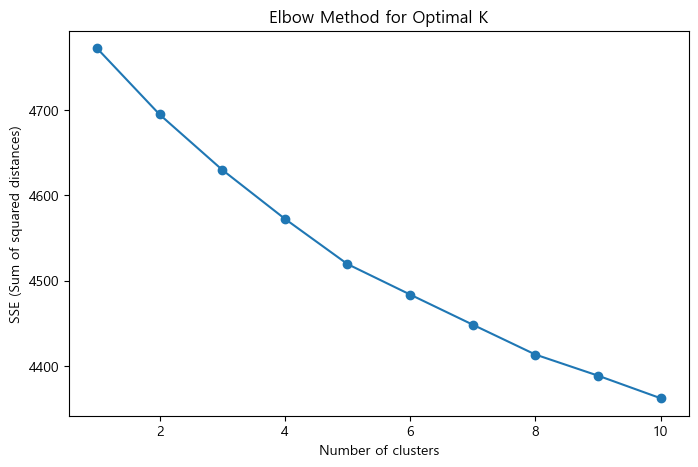

In [45]:
# 1. 엘보우(Elbow) 방법 : 클러스터링 수 결정
# 엘보우 방법은 클러스터 내 오차제곱합(SSE)을 계산하여 클러스터 수가 증가할 때 
# SSE의 감소가 급격히 완화되는 지점을 찾아 클러스터 수를 결정
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 클러스터 개수의 범위 설정 (1부터 10까지)
cluster_range = range(1, 11)
sse = []  # SSE 값을 저장할 리스트

# 각 클러스터 개수에 대해 K-Means 모델 학습
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    kmeans.fit(tfidf_array)  # tfidf_matrix는 TF-IDF로 벡터화된 데이터
    sse.append(kmeans.inertia_)  # inertia는 클러스터 내 오차제곱합(SSE)

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE (Sum of squared distances)')
plt.show()

해석:
SSE (오차 제곱합): 클러스터 내부의 각 데이터 포인트와 클러스터 중심 간의 거리 합을 의미하며, 값이 낮을수록 데이터가 중심에 더 가까이 모여 있다는 것을 뜻합니다.
엘보우 포인트: 그래프에서 기울기가 급격히 완화되는 지점을 찾습니다. 이 지점 이후로는 클러스터 수를 더 증가시켜도 SSE 감소 폭이 작아지며, 효율성이 떨어지기 시작합니다.
최적 K 값 추정:
K = 3 또는 4에서 그래프의 기울기가 급격히 완화되고 있습니다. 이 지점을 엘보우 포인트로 보고, 이 근처가 최적의 클러스터 수로 추정됩니다.

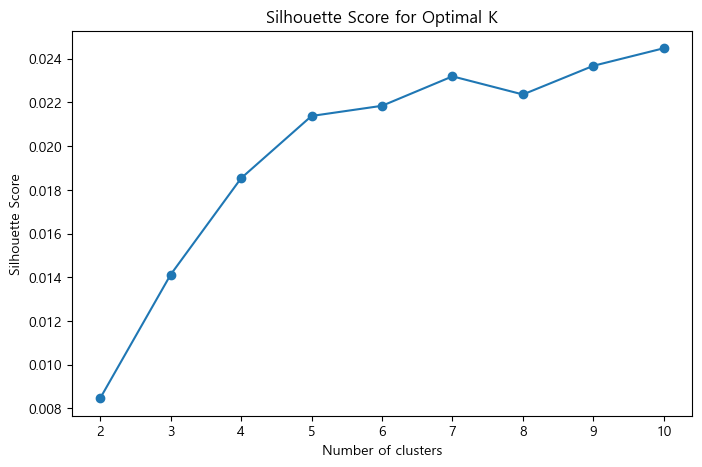

In [46]:
# 2. 실루엣(Silhouette) 점수 코드
# 실루엣 점수는 각 데이터 포인트가 얼마나 잘 속한 클러스터와 가까우며, 
# 다른 클러스터와는 얼마나 멀리 떨어져 있는지를 평가
# 값이 1에 가까울수록 클러스터링이 잘된 것

from sklearn.metrics import silhouette_score

# 클러스터 개수 범위 설정 (2부터 10까지)
silhouette_scores = []

# 각 클러스터 개수에 대해 K-Means 모델 학습 및 실루엣 점수 계산
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # n_init 값을 명시적으로 10으로 설정
    clusters = kmeans.fit_predict(tfidf_array)
    silhouette_avg = silhouette_score(tfidf_array, clusters)
    silhouette_scores.append(silhouette_avg)

# 실루엣 점수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


그래프 해석:
실루엣 스코어는 클러스터 간의 분리도와 밀집도를 평가하는 지표로, 1에 가까울수록 더 좋은 클러스터링 결과를 나타냅니다.
최적 K 값은 실루엣 스코어가 최대인 지점에서 결정될 수 있습니다.
최적 K 값 추정:
그래프에서 K = 7일 때 실루엣 스코어가 가장 높습니다. 이는 7개의 클러스터로 나누는 것이 클러스터링 결과가 가장 좋음을 의미합니다.
K = 10에서도 약간 상승하지만, K = 7에서 이미 충분히 높은 스코어를 보이므로, 이를 기준으로 최적 클러스터 수로 삼을 수 있습니다.
따라서, 이 그래프에 따르면 K=7이 최적의 클러스터 수일 가능성이 가장 높습니다.

중심단어 보기

In [39]:
# 클러스터 중심 단어 출력 및 리스트 저장
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
terms = vectorizer.get_feature_names_out()  # 단어 목록

# 클러스터 중심 단어를 저장할 딕셔너리
cluster_keywords = {}

for i in range(num_clusters):
    cluster_keywords[i] = []  # 각 클러스터에 대한 빈 리스트 생성
    print(f"\n클러스터 {i + 1}의 중심 단어:")
    for ind in order_centroids[i, :10]:  # 각 클러스터에서 상위 10개 단어
        keyword = terms[ind]
        cluster_keywords[i].append(keyword)  # 중심 단어를 리스트에 추가
        print(f" {keyword}")

# 클러스터 중심 단어 리스트 확인
print("\n클러스터 중심 단어 리스트:")
for cluster_num, keywords in cluster_keywords.items():
    print(f"클러스터 {cluster_num + 1}: {keywords}")



클러스터 1의 중심 단어:
 회사
 지급
 채권
 사업
 있는
 000원
 이를
 임금
 주식회사
 손해

클러스터 2의 중심 단어:
 퇴직금
 퇴직
 지급
 회사
 임금
 근로자
 근로기준법
 공사
 개정
 근로

클러스터 3의 중심 단어:
 망인
 사망
 재해
 인과관계
 질병
 스트레스
 차량
 회사
 보험
 근무

클러스터 4의 중심 단어:
 노동조합
 쟁의
 노조
 단체
 협약
 조합원
 노동
 회사
 조합
 교섭

클러스터 5의 중심 단어:
 소득
 세법
 과세
 금액
 징수
 부과
 소득세
 세액
 귀속
 법인

클러스터 6의 중심 단어:
 징계
 해고
 회사
 노동조합
 협약
 인사
 단체
 취업규칙
 근로자
 징계처분

클러스터 7의 중심 단어:
 보험
 재해
 산재
 보험료
 사업
 급여
 산업
 지급
 근로자
 공단

클러스터 8의 중심 단어:
 임금
 수당
 지급
 근로시간
 근로
 휴일
 통상
 휴가
 근로자
 근로기준법

클러스터 9의 중심 단어:
 근로자
 계약
 근로
 해고
 회사
 파견
 지급
 사업
 사용자
 임금

클러스터 10의 중심 단어:
 장해
 요양
 등급
 재해
 상병
 보험
 급여
 진폐
 연금
 지급

클러스터 중심 단어 리스트:
클러스터 1: ['회사', '지급', '채권', '사업', '있는', '000원', '이를', '임금', '주식회사', '손해']
클러스터 2: ['퇴직금', '퇴직', '지급', '회사', '임금', '근로자', '근로기준법', '공사', '개정', '근로']
클러스터 3: ['망인', '사망', '재해', '인과관계', '질병', '스트레스', '차량', '회사', '보험', '근무']
클러스터 4: ['노동조합', '쟁의', '노조', '단체', '협약', '조합원', '노동', '회사', '조합', '교섭']
클러스터 5: ['소득', '세법', '과세', '금액', '징수', '부과', '소득세', '세액', '귀속', '법인']
클러스터 6: ['징계', '해고', '회사',

In [42]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# 클러스터별 상위 단어 및 그 단어들의 TF-IDF 값 확인
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("클러스터별 상위 단어 및 TF-IDF 값:")
for i in range(num_clusters):
    print(f"\n클러스터 {i+1}:")
    for ind in order_centroids[i, :10]:  # 상위 10개의 단어
        print(f"단어: {terms[ind]} - TF-IDF 값: {kmeans.cluster_centers_[i, ind]}")


클러스터별 상위 단어 및 TF-IDF 값:

클러스터 1:
단어: 회사 - TF-IDF 값: 0.03663969767049682
단어: 지급 - TF-IDF 값: 0.03012202203773719
단어: 채권 - TF-IDF 값: 0.025714306185961922
단어: 사업 - TF-IDF 값: 0.021170849091092618
단어: 있는 - TF-IDF 값: 0.021002332352262558
단어: 000원 - TF-IDF 값: 0.02022988504975754
단어: 이를 - TF-IDF 값: 0.01904163364530321
단어: 임금 - TF-IDF 값: 0.018049015478516464
단어: 주식회사 - TF-IDF 값: 0.017876611614825084
단어: 손해 - TF-IDF 값: 0.01670564942865592

클러스터 2:
단어: 퇴직금 - TF-IDF 값: 0.294065564866621
단어: 퇴직 - TF-IDF 값: 0.13718188888085495
단어: 지급 - TF-IDF 값: 0.13340556314463087
단어: 회사 - TF-IDF 값: 0.08649358664507287
단어: 임금 - TF-IDF 값: 0.08246482783113582
단어: 근로자 - TF-IDF 값: 0.07280239759395107
단어: 근로기준법 - TF-IDF 값: 0.04809960713276641
단어: 공사 - TF-IDF 값: 0.04050025856480345
단어: 개정 - TF-IDF 값: 0.03941067071810999
단어: 근로 - TF-IDF 값: 0.03855638701042665

클러스터 3:
단어: 망인 - TF-IDF 값: 0.37907622169220623
단어: 사망 - TF-IDF 값: 0.10720128809299763
단어: 재해 - TF-IDF 값: 0.10020192417639727
단어: 인과관계 - TF-IDF 값: 0.05527097763007289

2차원 차원 축소 시각화

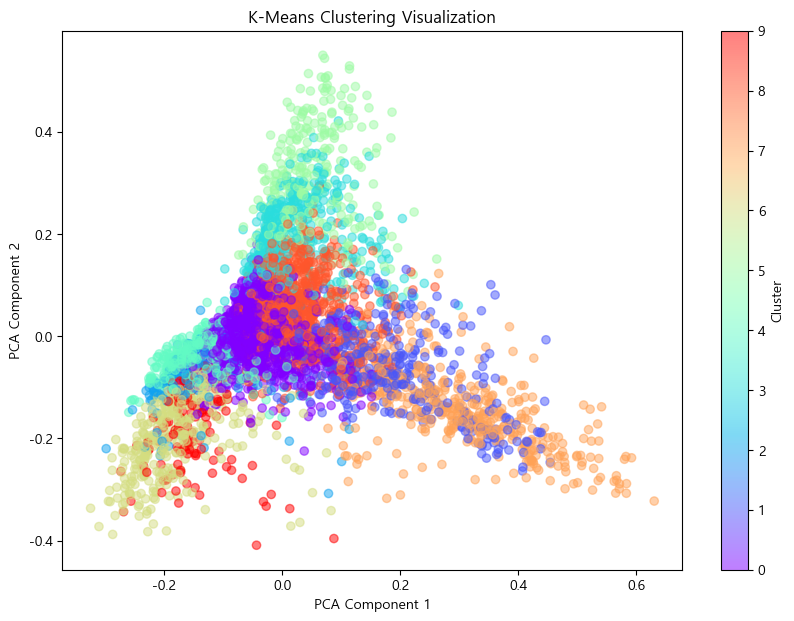

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# 9. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array.toarray())

plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_labor['클러스터'], cmap='rainbow', alpha=0.5)
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

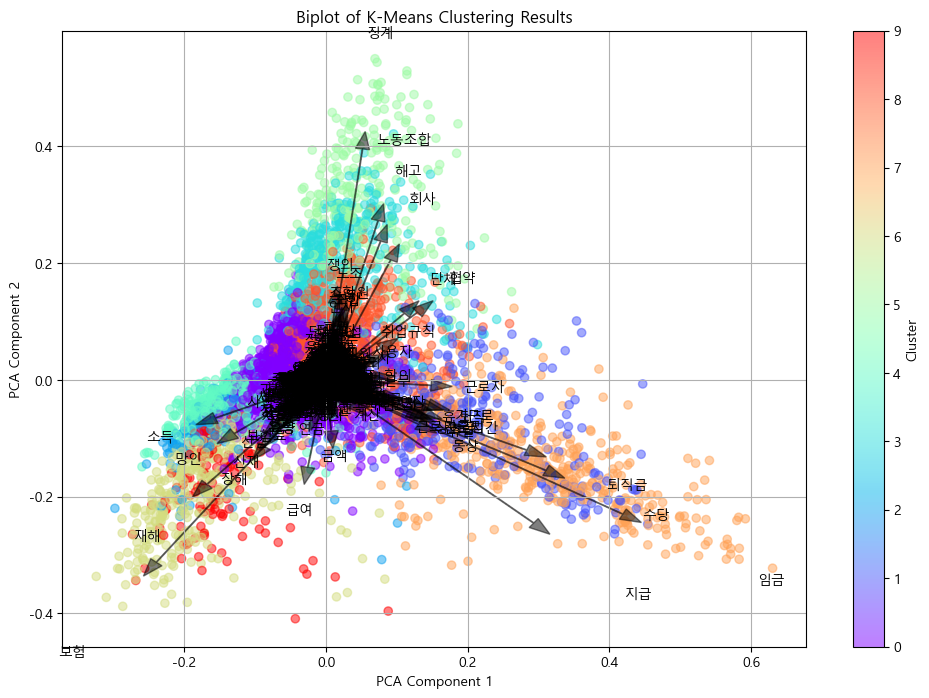

In [33]:
# 4. PCA를 사용한 2D 시각화 (차원 축소)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_array.toarray())

# 5. Biplot 생성
plt.figure(figsize=(12, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans.labels_, cmap='rainbow', alpha=0.5)

# PCA 축의 단어 벡터 추가
for i in range(len(vectorizer.get_feature_names_out())):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='black', alpha=0.5, head_width=0.02)

    # 단어 라벨 추가
    plt.text(pca.components_[0, i] * 1.5, pca.components_[1, i] * 1.5,
             vectorizer.get_feature_names_out()[i], color='black', ha='center', va='center')

plt.title('Biplot of K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.colorbar(label='Cluster')
plt.show()

In [49]:
# 6. 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_

# 7. 각 클러스터의 중심 단어 추출
def get_top_keywords_for_clusters(cluster_centers, vectorizer, n_words=10):
    order_centroids = cluster_centers.argsort()[:, ::-1]  # 각 클러스터의 중심 단어 인덱스 정렬
    terms = vectorizer.get_feature_names_out()  # 단어 목록
    
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_keywords[i] = [terms[ind] for ind in order_centroids[i, :n_words]]  # 상위 n_words 단어
    
    return cluster_keywords

# 8. 클러스터 중심 단어 출력
cluster_keywords = get_top_keywords_for_clusters(cluster_centers, vectorizer)
for cluster_num, keywords in cluster_keywords.items():
    print(f"\n클러스터 {cluster_num + 1}의 중심 단어들: {', '.join(keywords)}")


클러스터 1의 중심 단어들: 회사, 지급, 채권, 사업, 있는, 000원, 이를, 임금, 주식회사, 손해

클러스터 2의 중심 단어들: 퇴직금, 퇴직, 지급, 회사, 임금, 근로자, 근로기준법, 공사, 개정, 근로

클러스터 3의 중심 단어들: 망인, 사망, 재해, 인과관계, 질병, 스트레스, 차량, 회사, 보험, 근무

클러스터 4의 중심 단어들: 노동조합, 쟁의, 노조, 단체, 협약, 조합원, 노동, 회사, 조합, 교섭

클러스터 5의 중심 단어들: 소득, 세법, 과세, 금액, 징수, 부과, 소득세, 세액, 귀속, 법인

클러스터 6의 중심 단어들: 징계, 해고, 회사, 노동조합, 협약, 인사, 단체, 취업규칙, 근로자, 징계처분

클러스터 7의 중심 단어들: 보험, 재해, 산재, 보험료, 사업, 급여, 산업, 지급, 근로자, 공단

클러스터 8의 중심 단어들: 임금, 수당, 지급, 근로시간, 근로, 휴일, 통상, 휴가, 근로자, 근로기준법

클러스터 9의 중심 단어들: 근로자, 계약, 근로, 해고, 회사, 파견, 지급, 사업, 사용자, 임금

클러스터 10의 중심 단어들: 장해, 요양, 등급, 재해, 상병, 보험, 급여, 진폐, 연금, 지급


# 4. 시각화 하기

클러스터_키워드 상위 중요 단어 워드클라우드로 표시

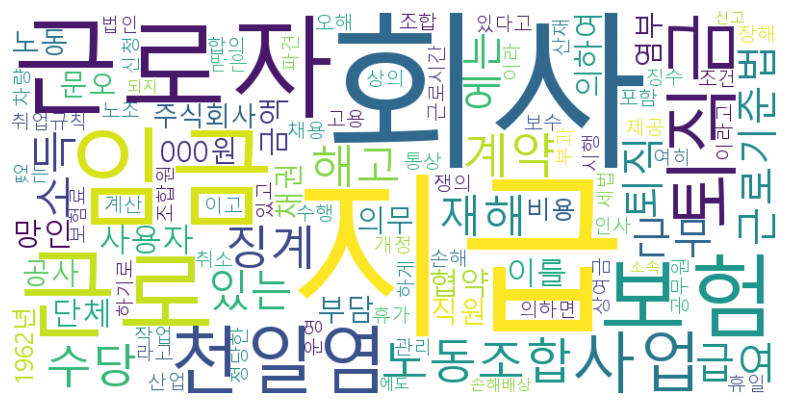

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager

# 한글 폰트 설정 (예: Malgun Gothic)
font_path = 'C:/Windows/Fonts/malgun.ttf'  # Windows에서의 경우
# MacOS의 경우 'AppleGothic.ttf' 같은 폰트 경로를 설정할 수 있습니다.

# TF-IDF 벡터라이저로 얻은 데이터프레임에서 상위 중요 단어 100개만 시각화
top_n = 100

# 각 단어별 평균 TF-IDF 점수를 계산
tfidf_means = tfidf_df.mean().sort_values(ascending=False)[:top_n]

# 워드클라우드 생성, 한글 폰트 적용
wordcloud = WordCloud(
    font_path=font_path,  # 한글 폰트 경로 지정
    width=800, 
    height=400, 
    background_color='white'
).generate_from_frequencies(tfidf_means)

# 워드클라우드 출력
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 숨김
plt.show()

판례내용 불용어 처리 후 단어간의 상관관계 비교

In [57]:
# 네트워크 분석, 히트맵 분석

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


vectorizer = TfidfVectorizer(max_features=50)
tfidf_matrix = vectorizer.fit_transform(df_labor['판례내용_제거(불용어)'])

# 4. 단어 리스트 추출
terms = vectorizer.get_feature_names_out()

# 5. 공동 출현 행렬 생성
co_occurrence_matrix = (tfidf_matrix.T @ tfidf_matrix).toarray()

# 6. 네트워크 분석: NetworkX 사용
G = nx.Graph()

# 상관계수가 일정 이상인 단어들만 네트워크에 추가 (상관계수 기준)
threshold = 0.05  # 상관관계가 이 값 이상인 단어들만 추가
for i in range(len(terms)):
    for j in range(i + 1, len(terms)):
        if co_occurrence_matrix[i, j] > threshold:
            G.add_edge(terms[i], terms[j], weight=co_occurrence_matrix[i, j])

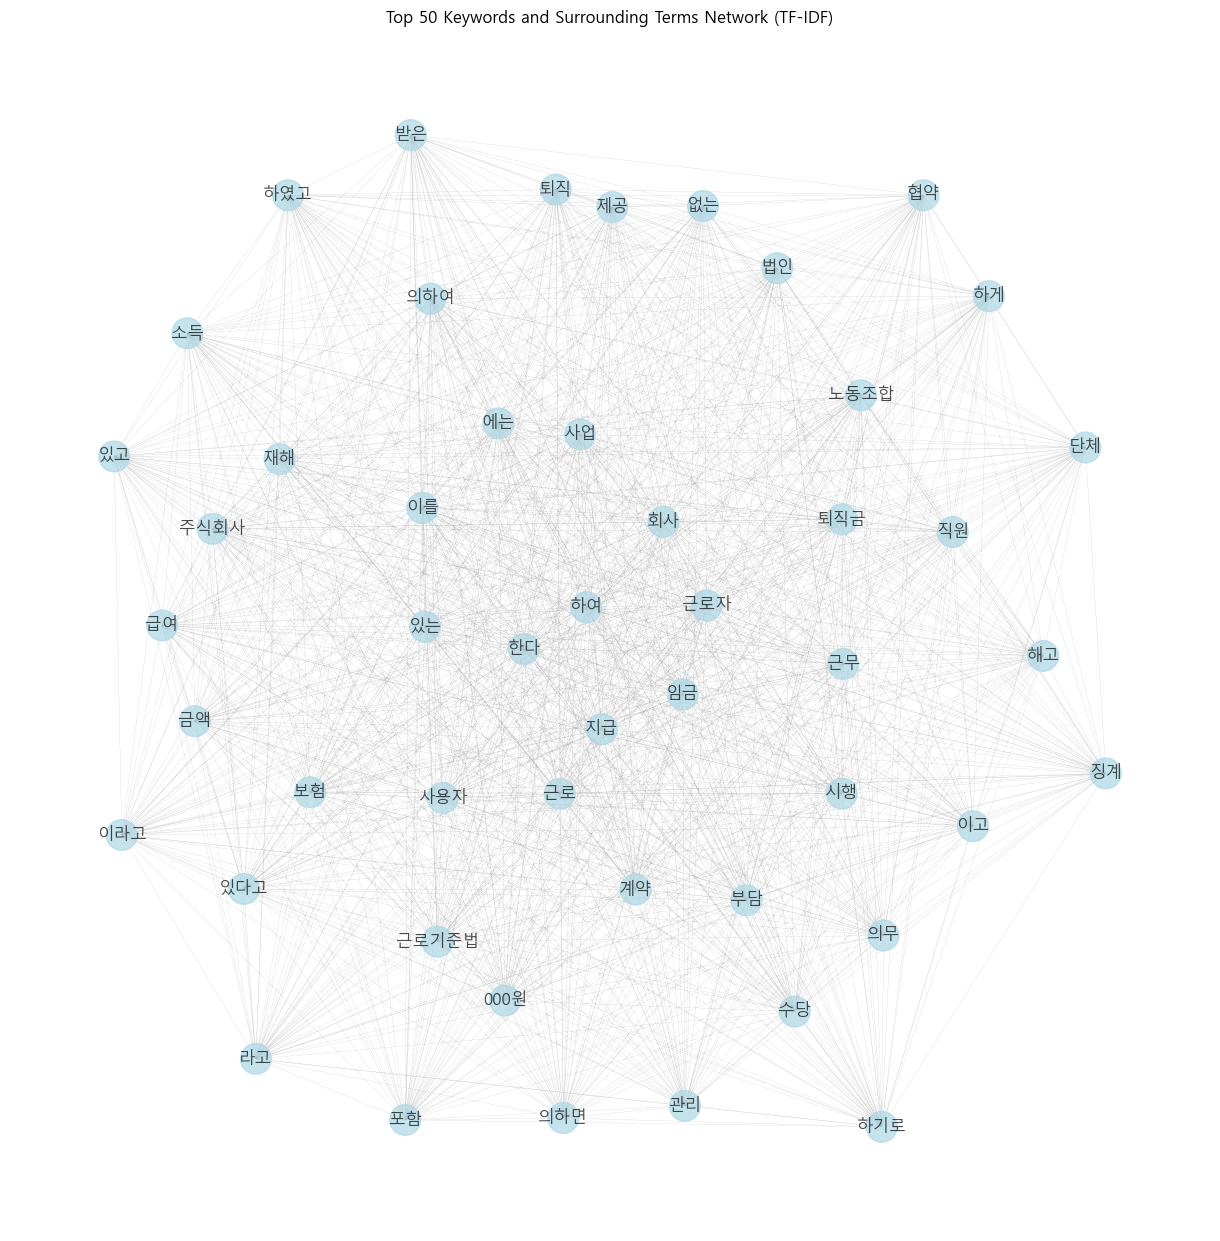

In [58]:
# 필요한 패키지 import
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

# 한글폰트 설정 (윈도우즈에서만)
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# 마이너스 폰트 설정 (깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 네트워크 그래프 생성 (G가 사전에 정의되어 있어야 함)
# 예시로 G를 하나 생성합니다. 실제 사용 시에는 기존 G를 사용하세요.
# G = nx.Graph()  # 만약 G가 없을 경우 샘플로 추가

# 노드 라벨 설정
for node in G.nodes():
    G.nodes[node]['label'] = node  # 노드 이름을 라벨로 설정

# 레이아웃 설정 (스프링 레이아웃)
pos = nx.spring_layout(G, k=0.3)  # k 값 조절하여 노드 간 간격 조절

# 노드 크기 설정 (degree를 기반으로)
node_sizes = [d for n, d in G.degree()]

# 시각화
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],  # 윈도우즈에서는 한글 폰트 사용
        node_size=[d * 10 for d in node_sizes],  # 노드 크기 조절
        node_color='lightblue',
        alpha=0.7,  # 노드 투명도
        width=0.1,  # 선 두께
        edge_color='gray')
plt.title('Top 50 Keywords and Surrounding Terms Network (TF-IDF)')
plt.show()


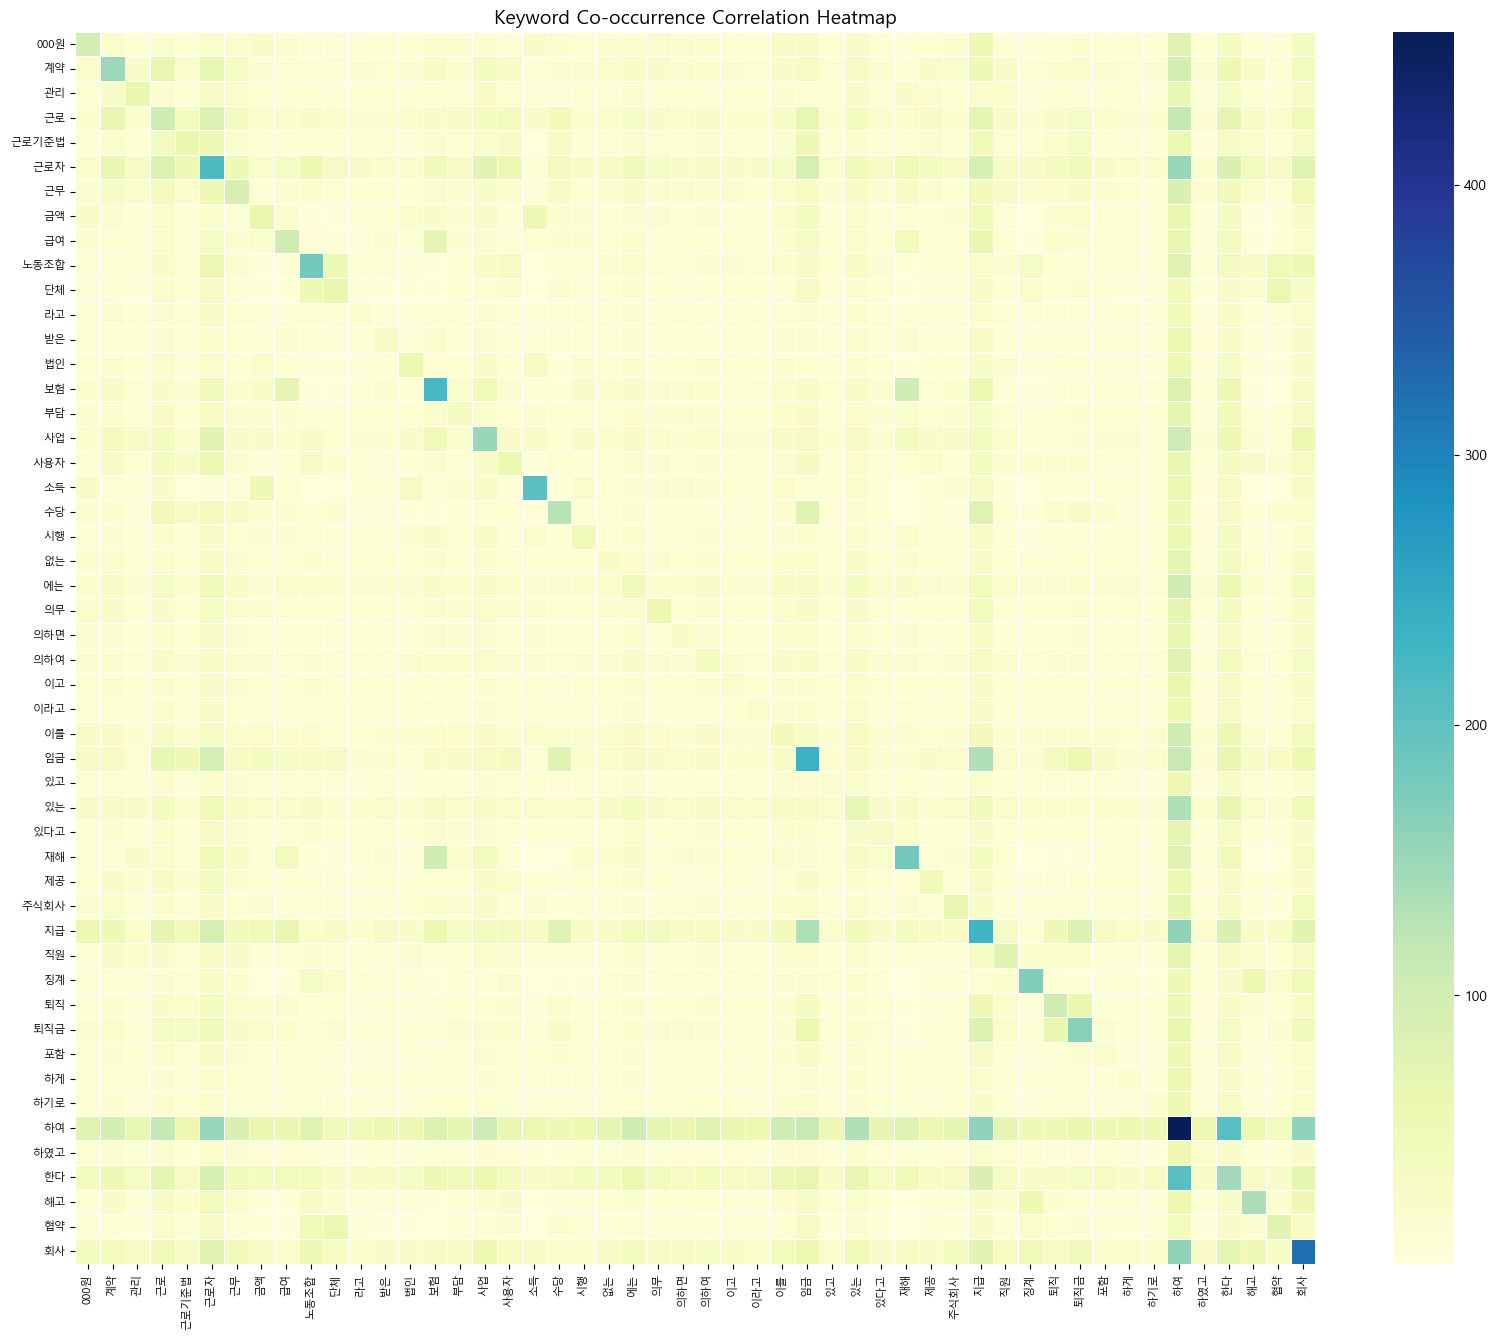

In [60]:
# 상관관계 히트맵 생성 (크기 조정 및 텍스트 크기 조정)
plt.figure(figsize=(20, 16))  # figsize를 크게 조정하여 가독성 향상

sns.heatmap(co_occurrence_matrix, cmap="YlGnBu", 
            xticklabels=terms, yticklabels=terms, 
            cbar=True, annot=False,  # 값 표시는 제거
            linewidths=.5)  # 셀 간 간격 추가

plt.xticks(rotation=90, fontsize=8)  # x축 라벨을 90도 회전하고 글씨 크기 줄임
plt.yticks(fontsize=8)  # y축 글씨 크기 줄임
plt.title("Keyword Co-occurrence Correlation Heatmap", fontsize=14)
plt.show()


클러스터링 이후 상관관계 분석

1. 클러스터링된 키워드로 네트워크 분석
네트워크 분석은 클러스터 내에서 또는 클러스터 간 키워드들 간의 관계를 시각화하는 방법입니다. 이를 위해서는 클러스터링된 결과에서 각 클러스터의 주요 키워드를 추출하고, 그 키워드 간의 연결을 생성하는 작업이 필요합니다

In [65]:
# 각 클러스터에서 주요 키워드 추출 (상위 10개 키워드 예시)
top_n = 10  # 클러스터당 상위 키워드 개수
clusters_top_keywords = {}

for cluster_num in range(num_clusters):
    cluster_docs = tfidf_df[df_labor['클러스터'] == cluster_num]  # 해당 클러스터의 문서들
    top_keywords = cluster_docs.sum().sort_values(ascending=False).head(top_n).index
    clusters_top_keywords[cluster_num] = top_keywords

# 각 클러스터에서 추출된 상위 키워드를 확인
for cluster, keywords in clusters_top_keywords.items():
    print(f"클러스터 {cluster}의 상위 키워드: {keywords}")

클러스터 0의 상위 키워드: Index(['회사', '지급', '채권', '있는', '사업', '000원', '이를', '주식회사', '임금', '근로자'], dtype='object')
클러스터 1의 상위 키워드: Index(['퇴직금', '퇴직', '지급', '회사', '임금', '근로자', '근로기준법', '개정', '공사', '직원'], dtype='object')
클러스터 2의 상위 키워드: Index(['망인', '사망', '재해', '인과관계', '질병', '스트레스', '차량', '회사', '보험', '근무'], dtype='object')
클러스터 3의 상위 키워드: Index(['노동조합', '쟁의', '노조', '단체', '협약', '조합원', '노동', '회사', '조합', '교섭'], dtype='object')
클러스터 4의 상위 키워드: Index(['소득', '세법', '과세', '금액', '부과', '징수', '소득세', '귀속', '법인', '세액'], dtype='object')
클러스터 5의 상위 키워드: Index(['징계', '해고', '회사', '노동조합', '협약', '인사', '단체', '취업규칙', '근로자', '징계처분'], dtype='object')
클러스터 6의 상위 키워드: Index(['보험', '재해', '산재', '보험료', '사업', '급여', '산업', '지급', '근로자', '공단'], dtype='object')
클러스터 7의 상위 키워드: Index(['임금', '수당', '지급', '근로시간', '통상', '휴가', '휴일', '근로자', '근로기준법', '상여금'], dtype='object')
클러스터 8의 상위 키워드: Index(['근로자', '계약', '해고', '회사', '파견', '지급', '사업', '사용자', '임금', '근무'], dtype='object')
클러스터 9의 상위 키워드: Index(['장해', '요양', '등급', '재해', '상병', '보험', '급여',

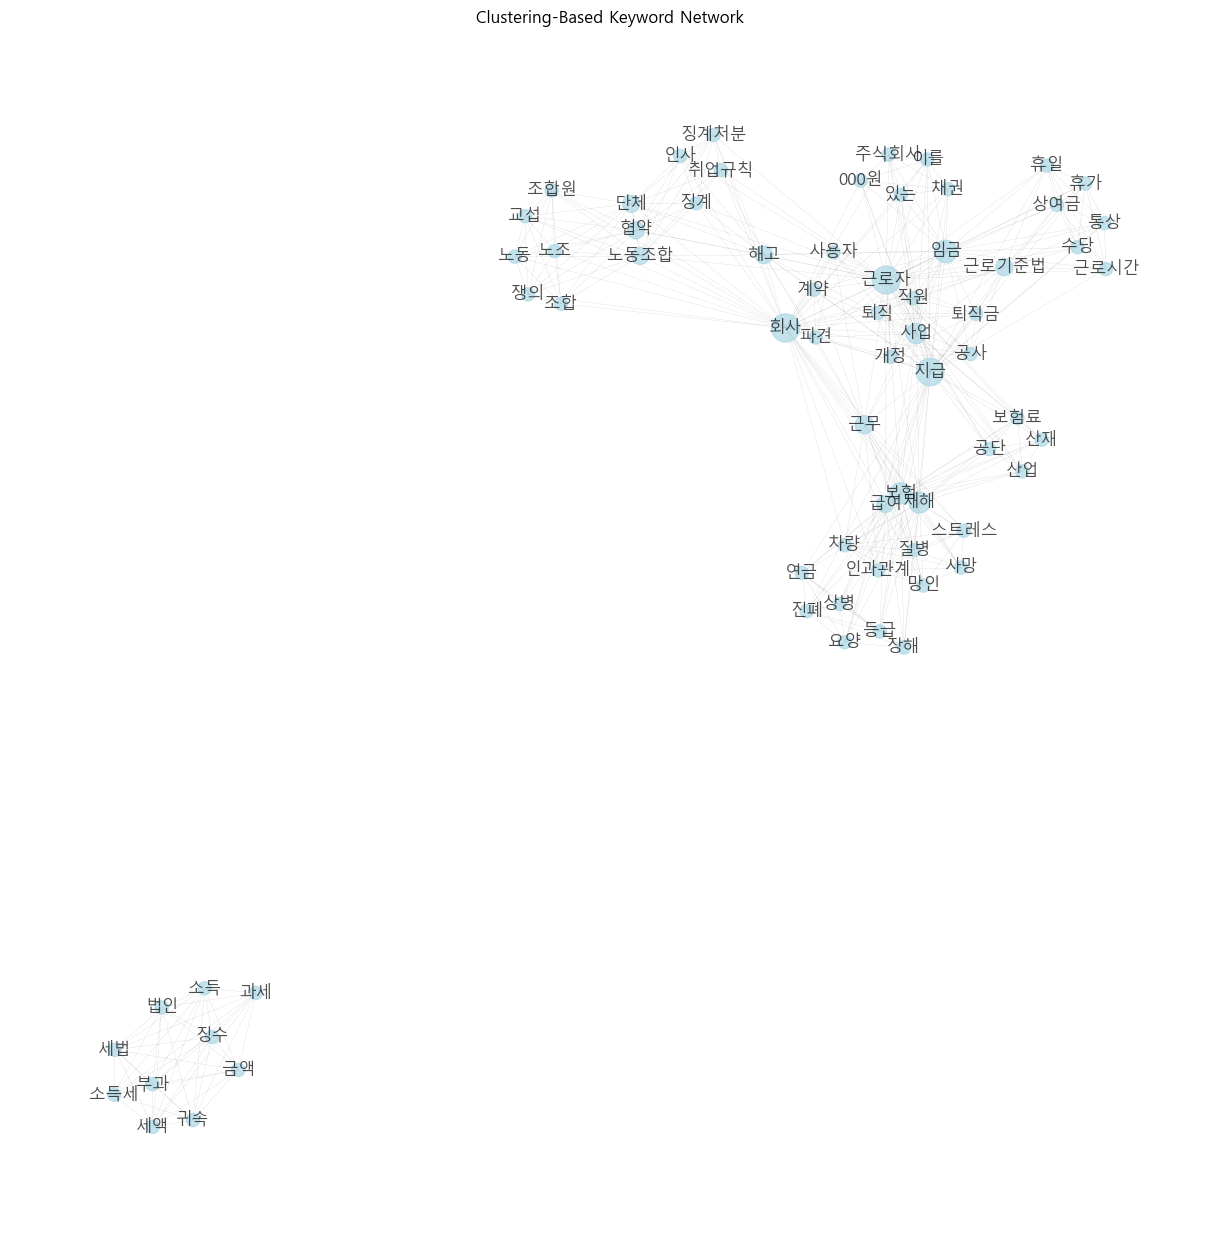

In [69]:
# 필요한 패키지 import
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import font_manager, rc
import platform

# 한글폰트 설정 (윈도우즈에서만)
if platform.system() == 'Windows':
    font_path = 'C:/Windows/Fonts/malgun.ttf'  # 맑은 고딕 폰트 경로
    font_name = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family=font_name)

# 마이너스 폰트 설정 (깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False

# 네트워크 그래프 생성
G = nx.Graph()

# 클러스터별 키워드를 노드로 추가하고, 키워드 간 엣지 설정
for cluster, keywords in clusters_top_keywords.items():
    for keyword in keywords:
        G.add_node(keyword, cluster=cluster)  # 노드 추가
    for i in range(len(keywords)):
        for j in range(i + 1, len(keywords)):
            G.add_edge(keywords[i], keywords[j])  # 엣지 추가

# 노드 라벨 설정
for node in G.nodes():
    G.nodes[node]['label'] = node  # 노드 이름을 라벨로 설정

# 레이아웃 설정 (스프링 레이아웃)
pos = nx.spring_layout(G, k=0.3)  # k 값 조절하여 노드 간 간격 조절

# 노드 크기 설정 (degree를 기반으로)
node_sizes = [d for n, d in G.degree()]

# 시각화
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, font_family=plt.rcParams['font.family'],  # 윈도우즈에서는 한글 폰트 사용
        node_size=[d * 10 for d in node_sizes],  # 노드 크기 조절
        node_color='lightblue',
        alpha=0.7,  # 노드 투명도
        width=0.1,  # 선 두께
        edge_color='gray')
plt.title('Clustering-Based Keyword Network')
plt.show()

히트맵분석

[[1.00000000e+00 1.55802132e-01 2.68012241e-02 ... 2.99313518e-01
  3.87774217e-01 1.56158775e-01]
 [1.55802132e-01 1.00000000e+00 2.21335984e-03 ... 9.62582604e-03
  5.71505819e-02 3.93443408e-03]
 [2.68012241e-02 2.21335984e-03 1.00000000e+00 ... 7.49615763e-05
  1.48596424e-02 4.53655693e-02]
 ...
 [2.99313518e-01 9.62582604e-03 7.49615763e-05 ... 1.00000000e+00
  1.12522910e-01 2.10421835e-02]
 [3.87774217e-01 5.71505819e-02 1.48596424e-02 ... 1.12522910e-01
  1.00000000e+00 2.08221408e-01]
 [1.56158775e-01 3.93443408e-03 4.53655693e-02 ... 2.10421835e-02
  2.08221408e-01 1.00000000e+00]]


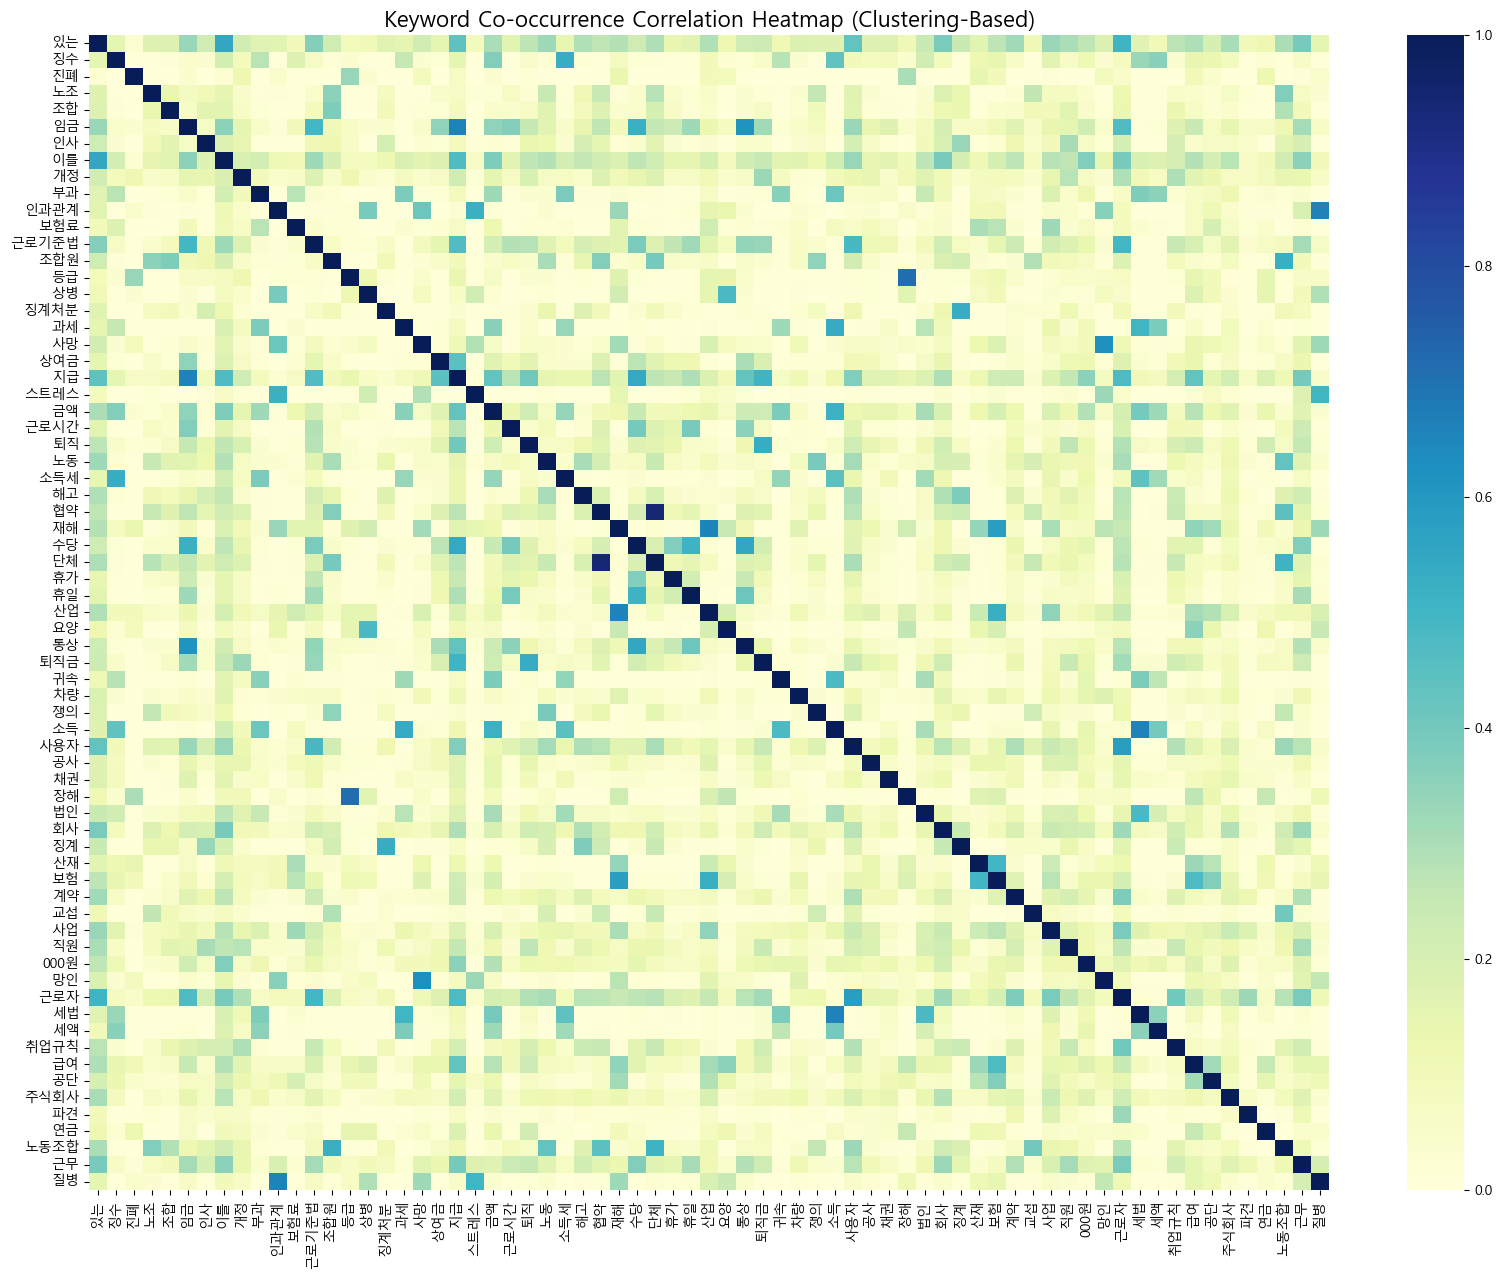

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# 1. clusters_top_keywords에서 모든 키워드를 추출하여 중복 제거
all_keywords = list(set([keyword for keywords in clusters_top_keywords.values() for keyword in keywords]))

# 2. 상위 키워드들에 대한 TF-IDF 값 필터링 (모든 문서에서 해당 키워드들의 TF-IDF 값만 추출)
df_top_keywords_tfidf = tfidf_df[all_keywords]

# 3. 결측치(NaN) 값을 0으로 대체
df_top_keywords_tfidf = df_top_keywords_tfidf.fillna(0)

# 4. 코사인 유사도 행렬 계산
cosine_sim_matrix = cosine_similarity(df_top_keywords_tfidf.T)
print(cosine_sim_matrix)

# 5. 히트맵 시각화 (크기, 라벨 회전, 폰트 크기 조정)
plt.figure(figsize=(20, 15))  # 히트맵 크기 확대
sns.heatmap(cosine_sim_matrix, cmap="YlGnBu", 
            xticklabels=all_keywords, yticklabels=all_keywords, 
            cbar=True, annot=False)  # 값 표시를 제거하여 깔끔하게

plt.xticks(rotation=90, fontsize=10)  # X축 라벨을 90도 회전하고 폰트 크기를 작게 설정
plt.yticks(rotation=0, fontsize=10)   # Y축 폰트 크기도 줄임
plt.title("Keyword Co-occurrence Correlation Heatmap (Clustering-Based)", fontsize=16)
plt.show()


코드 설명:
상삼각행렬: 코사인 유사도 행렬은 대칭 행렬이므로, 대각선 상단 부분(상삼각행렬)만을 고려하여 최대값을 찾습니다. 이를 위해 np.triu() 함수를 사용하여 상삼각행렬을 추출하고, 대각선(k=1)은 제외합니다.
최대값 인덱스 찾기: np.argmax()를 사용하여 상삼각행렬에서 가장 큰 값을 가진 인덱스를 찾습니다.
단어 쌍 추출: 해당 인덱스를 이용해 all_keywords 리스트에서 가장 높은 상관관계를 가진 두 단어를 추출하여 출력합니다.
결과 출력: 가장 높은 상관관계 값을 가진 단어 쌍과 그 상관관계 값을 출력합니다.

In [75]:
import numpy as np

# 1. 코사인 유사도 행렬에서 상삼각행렬의 최대값 찾기
# 유사도 행렬의 대각선은 자기 자신과의 유사도(항상 1)임을 감안하여 대각선 위의 값들만 고려
upper_triangle = np.triu(cosine_sim_matrix, k=1)  # k=1로 대각선은 제외

# 2. 최대값의 인덱스 추출
max_idx = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)

# 3. 해당 인덱스에 해당하는 단어 쌍 출력
word1 = all_keywords[max_idx[0]]
word2 = all_keywords[max_idx[1]]
max_value = cosine_sim_matrix[max_idx[0], max_idx[1]]

print(f"가장 높은 상관관계를 가진 단어 쌍: '{word1}'와 '{word2}'")
print(f"상관관계 값: {max_value:.4f}")


가장 높은 상관관계를 가진 단어 쌍: '협약'와 '단체'
상관관계 값: 0.9418


In [76]:
import numpy as np

# 1. 코사인 유사도 행렬에서 상삼각행렬 추출 (대각선 제외)
upper_triangle = np.triu(cosine_sim_matrix, k=1)

# 2. 상위 30개의 상관관계 값과 그 인덱스를 추출
# flatten으로 1차원 배열로 변환 후, 상위 30개의 인덱스를 argsort로 정렬된 순서에서 뒤에서 30개 추출
top_30_indices = np.argsort(upper_triangle.flatten())[-30:]

# 3. 해당 인덱스들을 2차원으로 변환 (단어 쌍 인덱스 추출)
top_30_indices_2d = np.array(np.unravel_index(top_30_indices, upper_triangle.shape)).T

# 4. 상위 30개 단어 쌍과 그 상관관계 값을 출력
print("상위 30개 상관관계가 높은 단어 쌍:")
for idx_pair in top_30_indices_2d:
    word1 = all_keywords[idx_pair[0]]
    word2 = all_keywords[idx_pair[1]]
    similarity_value = cosine_sim_matrix[idx_pair[0], idx_pair[1]]
    print(f"'{word1}'와 '{word2}' - 상관관계 값: {similarity_value:.4f}")

상위 30개 상관관계가 높은 단어 쌍:
'근로기준법'와 '근로자' - 상관관계 값: 0.4943
'산재'와 '보험' - 상관관계 값: 0.4985
'스트레스'와 '질병' - 상관관계 값: 0.5001
'과세'와 '세법' - 상관관계 값: 0.5029
'지급'와 '퇴직금' - 상관관계 값: 0.5053
'있는'와 '근로자' - 상관관계 값: 0.5072
'수당'와 '휴일' - 상관관계 값: 0.5114
'단체'와 '노동조합' - 상관관계 값: 0.5115
'금액'와 '소득' - 상관관계 값: 0.5159
'인과관계'와 '스트레스' - 상관관계 값: 0.5202
'임금'와 '수당' - 상관관계 값: 0.5228
'조합원'와 '노동조합' - 상관관계 값: 0.5245
'산업'와 '보험' - 상관관계 값: 0.5263
'징계처분'와 '징계' - 상관관계 값: 0.5280
'징수'와 '소득세' - 상관관계 값: 0.5287
'퇴직'와 '퇴직금' - 상관관계 값: 0.5351
'과세'와 '소득' - 상관관계 값: 0.5389
'지급'와 '수당' - 상관관계 값: 0.5461
'수당'와 '통상' - 상관관계 값: 0.5469
'있는'와 '이를' - 상관관계 값: 0.5500
'재해'와 '보험' - 상관관계 값: 0.5791
'사용자'와 '근로자' - 상관관계 값: 0.5794
'임금'와 '통상' - 상관관계 값: 0.6133
'사망'와 '망인' - 상관관계 값: 0.6258
'재해'와 '산업' - 상관관계 값: 0.6552
'소득'와 '세법' - 상관관계 값: 0.6572
'임금'와 '지급' - 상관관계 값: 0.6591
'인과관계'와 '질병' - 상관관계 값: 0.6609
'등급'와 '장해' - 상관관계 값: 0.7110
'협약'와 '단체' - 상관관계 값: 0.9418
